In [1]:
import sklearn
import numpy as np
import scipy.misc as misc
from sklearn import svm
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

Load the Data

In [2]:
def learn_set(source,ct):
    x = []
    for i in range(ct):
        f = misc.imread('%s%s.jpg'%(source,i+1)).astype(float)
        g = (f-np.min(f))/(np.max(f)-np.min(f))
        h1 = (g[:,:,0]-np.average(g[:,:,0]))/np.std(g[:,:,0])
        h2 = (g[:,:,1]-np.average(g[:,:,1]))/np.std(g[:,:,1])
        h3 = (g[:,:,2]-np.average(g[:,:,2]))/np.std(g[:,:,2])
        x.append(h1)
        x.append(h2)
        x.append(h3)
    print(x[0].shape)
    return np.array(x) 

Classify Data

In [3]:
def train_fruit_classifiers(data,labels):
    X,tru_y = shuffle(data,labels,random_state=0)
    clfb = svm.SVR(kernel='rbf',tol=1e-3)
    clfb.fit(X,tru_y)
    return clfb

#predicts 1 image at a time
def predict(clfb,im):
    #seperate into 3-channels to predict on
    assert im.shape[0] == 3
    pred = np.average(clfb.predict(im))
    print(pred)
    return np.round(pred)

In [4]:
banana = learn_set('results/pinapple/pinapple',49)
# banana = np.average(np.append(banana[:,:,:,0],np.append(banana[:,:,:,1],banana[:,:,:,2],axis=0),axis=0),axis=0)
lemon = learn_set('results/lemon/lemon',49)
# lemon = np.average(np.append(lemon[:,:,:,0],np.append(lemon[:,:,:,1],lemon[:,:,:,2],axis=0),axis=0),axis=0)
tomato = learn_set('results/tomato/tomato',49)
# tomato = np.average(np.append(tomato[:,:,:,0],np.append(tomato[:,:,:,1],tomato[:,:,:,2],axis=0),axis=0),axis=0)

X = np.append(banana,np.append(lemon,tomato,axis=0),axis=0)
X = X.reshape((X.shape[0],X.shape[1]*X.shape[2]))

tru_y = []
for i in range(len(X)):
    if i < int(len(X)/3):
        tru_y.append(1)
    elif i >= int(len(X)/3) and i < int(2*len(X)/3):
        tru_y.append(2)
    else:
        tru_y.append(3)
tru_y = np.array(tru_y)
print(X.shape)
clfb = train_fruit_classifiers(X,tru_y)

(619L, 472L)
(619L, 472L)
(619L, 472L)
(441L, 292168L)


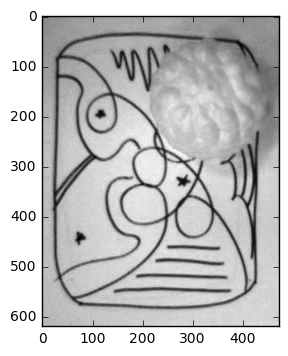

In [5]:
plt.imshow(banana[3],cmap='gray')

In [6]:
np.save('trained_svm_v3',([clfb]))

In [9]:
preds = []
j = 2
for i in range(45,49):
    f = misc.imread('results/lemon/lemon%i.jpg'%i).astype(float)
    g = (f-np.min(f))/(np.max(f)-np.min(f))
    h1 = (g[:,:,0]-np.average(g[:,:,0]))/np.std(g[:,:,0])
    h2 = (g[:,:,1]-np.average(g[:,:,1]))/np.std(g[:,:,1])
    h3 = (g[:,:,2]-np.average(g[:,:,2]))/np.std(g[:,:,2])
    test_im =np.array([h1,h2,h3])
    test_im = test_im.reshape((test_im.shape[0],test_im.shape[1]*test_im.shape[2]))
    preds.append(predict(clfb,test_im))
print(np.sum(np.array(preds)==j)/len(preds))

2.00512961322
1.94573206745
1.94831070947
2.08872339398
1
